In [7]:
import zarr
import matplotlib.pyplot as plt
import os
from skimage.transform import resize


In [8]:
os.listdir('/storage/home/hcoda1/7/mghanem8/scratch/datasets/')

['d3_2024-09-06_suture.zarr',
 'd3_2024-09-10.zarr',
 '52_d3_peg_transfer_2024-09-06_rel-RAW.zarr.tar.gz',
 '52_d3_back_needle_lift_2024-09-05_rel.zarr.tar.gz',
 '2024-09-05-liver-lift-needle.zarr.zip',
 'd3_2024-09-06_peg_transfer.zarr',
 '52_d3_back_suture_pad_2024-09-06_rel.zarr.tar.gz',
 'd3_2024-09-05_lift.zarr',
 '2024-09-10-tissue_lift.zarr.tar.gz',
 'd3_2024-09-05_handover.zarr',
 '2024-09-05-liver-lift-needle.zarr',
 '52_d3_back_needle_handover_2024-09-05_rel.zarr.tar.gz']

In [10]:
data_path = "/storage/home/hcoda1/7/mghanem8/scratch/datasets/2024-09-05-liver-lift-needle.zarr"
data = zarr.open(data_path, mode='r')
print(data.tree())

/
 ├── data
 │   ├── action (4932, 7) float32
 │   ├── image (4932, 1, 512, 512, 3) uint8
 │   ├── image_resized (4932, 1, 84, 84, 3) uint8
 │   ├── joint_pos (4932, 8) float32
 │   └── wrist_image (4932, 512, 512, 3) uint8
 └── meta
     └── episode_ends (52,) int64


In [4]:
rgbs = data['data/rgb']
rgbs.shape

(18123, 1, 512, 512, 3)

(128, 128, 3)
32 221


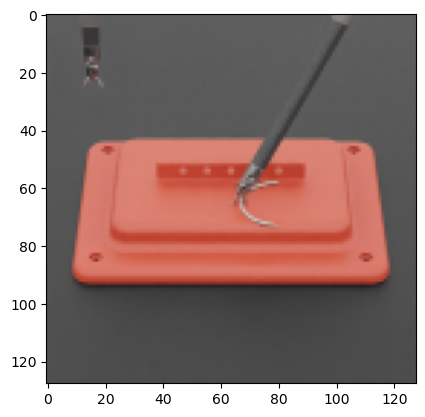

In [5]:
import cv2
idx = 100
rgb = rgbs[idx].squeeze()
new_H = new_W = 128
rgb = rgb.copy()
rgb = cv2.resize(rgb, (new_H, new_W), interpolation=cv2.INTER_AREA)
print(rgb.shape)

plt.imshow(rgb)

# value range
print(rgb.min(), rgb.max())